# 3ML with Fermi GBM TTE  and LAT LLE Data
### Purpose

This demonstrates of you can use LLE data directly in 3ML

For more detail on the Fermi TTE plugin, check out its demo.

#### Let's check it out!

Import **3ML** as always to make sure you have the plugin

In [2]:
%matplotlib inline
%matplotlib notebook
import numpy as np
from threeML import *

get_available_plugins()

Configuration read from /Users/jburgess/.threeML/threeML_config.yml
Available plugins:

FermiGBMTTELike for Fermi GBM TTE (all detectors)
FermiLATLLELike for Fermi LAT LLE
OGIPLike for All OGIP-compliant instruments
EventListLike for Generic EventList data
SwiftXRTLike for Swift XRT
VERITASLike for VERITAS


In [4]:
# os.path.join is a way to generate system-independent
# paths (good for unix, windows, Mac...)
trigger_number = 'bn080916009'

data_dir_gbm = os.path.join('gbm',trigger_number)
download_GBM_trigger_data(trigger_number,detectors=['n3','n4','b0'],destination_directory=data_dir_gbm,compress_tte=True)


data_dir_lle = os.path.join('lat','lle',trigger_number)


src_selection = "0.-71."


# We start out with a bad background interval to demonstrate a few features

nai3 = FermiGBMTTELike('NAI3',
                         os.path.join(data_dir_gbm, "glg_tte_n3_bn080916009_v01.fit.gz"),
                         "-10-0,100-200",
                         src_selection,
                         rsp_file=os.path.join(data_dir_gbm, "glg_cspec_n3_bn080916009_v07.rsp"),poly_order=-1,verbose=False)

nai3 = FermiGBMTTELike('NAI3',
                         os.path.join(data_dir_gbm, "glg_tte_n3_bn080916009_v01.fit.gz"),
                         "-10-0,100-200",
                         src_selection,
                         rsp_file=os.path.join(data_dir_gbm, "glg_cspec_n3_bn080916009_v07.rsp"),poly_order=-1,verbose=False)

bgo0 = FermiGBMTTELike('BGO0',
                         os.path.join(data_dir_gbm, "glg_tte_b0_bn080916009_v01.fit.gz"),
                         "-10-0,100-200",
                         src_selection,
                         rsp_file=os.path.join(data_dir_gbm, "glg_cspec_b0_bn080916009_v07.rsp"))


lle = FermiLATLLELike("LLE",
                      os.path.join(data_dir_lle, "gll_lle_bn080916009_v10.fit"),
                      os.path.join(data_dir_lle, "gll_pt_bn080916009_v10.fit"),
                      "-100-0,100-200",
                      src_selection,
                      rsp_file=os.path.join(data_dir_lle, "gll_cspec_bn080916009_v10.rsp"),poly_order=-1)


WARNING UserWarning: No TLMIN keyword found. This DRM does not follow OGIP standards. Assuming TLMIN=1


WARNING VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future



Auto-determined polynomial order: 1


Unbinned 1-order polynomial fit with the Nelder-Mead method


Auto-probed noise models:
- observation: poisson
- background: gaussian
Auto-determined polynomial order: 1


Binned 1-order polynomial fit with the Powell method


Auto-probed noise models:
- observation: poisson
- background: gaussian


In [4]:
threeML_config['event list']['unbinned fit method']

'Nelder-Mead'

In [3]:
nai3 = FermiGBMTTELike('NAI3',
                         os.path.join(data_dir_gbm, "glg_tte_n3_bn080916009_v01.fit.gz"),
                         "-10-0,100-200",
                         src_selection,
                         rsp_file=os.path.join(data_dir_gbm, "glg_cspec_n3_bn080916009_v07.rsp"),poly_order=-1,verbose=False)

Auto-determined polynomial order: 1




In [7]:
lle.peek()

LLE File Info:


Active Count Error                                  14.6332
Active Counts                                          1821
Active Deadtime                                      5.3301
Active Exposure                                     65.6699
Active Polynomial Counts                            394.438
Active Selections                             [(0.0, 71.0)]
Number of Channels                                       50
Poly fit method                                      Powell
Poly fit type                                        Binned
Polynomial Order                                          1
Polynomial Selections       [[-100.0, 0.0], [100.0, 200.0]]
Significance                                [40.8943475981]
Total N. Events                                       11230
dtype: object

Timing Info:


LIGO/GPS seconds since 1980-01-06 UTC (decimal)                  905559179.613
NuSTAR seconds since 2010.0 UTC (decimal)                        -40693634.387
RXTE seconds since 1994.0 UTC (decimal)                          464141567.235
Suzaku seconds since 2000.0 UTC (decimal)                        274839166.613
Swift seconds since 2001.0 UTC (decimal)                         243216768.714
UTC                                                2008-09-16 00:12:45.613 UTC
XMM/Chandra seconds since 1998.0 TT (decimal)                    337911230.797
dtype: object

Fermi MET OBS Start                 2.43216e+08
Fermi MET OBS Stop                  2.43218e+08
Fermi Trigger Time                  2.43217e+08
Fermi UTC OBS Start    2008-09-15T23:56:05.6130
Fermi UTC OBS Stop     2008-09-16T00:29:25.6129
dtype: object

Let's look at the lightcurve of NAI3 to check out background fit:

<IPython.core.display.Javascript object>


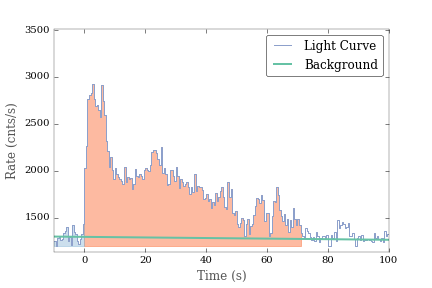

In [4]:
nai3.view_lightcurve(-10,100.,.5)

<IPython.core.display.Javascript object>


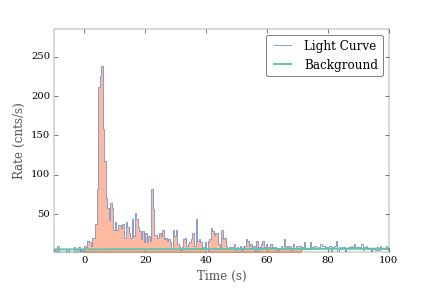

In [5]:
lle.view_lightcurve(-10,100,dt=.5)

### Energy selection



Range 10.0-30.0 translates to channels 6-21
Range 40.0-900.0 translates to channels 27-124
Now using 114 channels out of 128


<IPython.core.display.Javascript object>


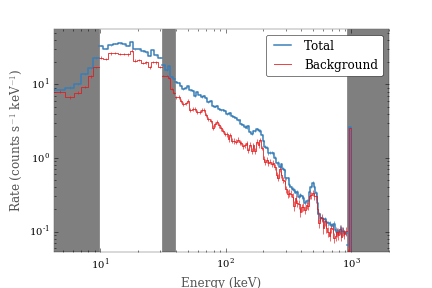

In [6]:
nai3.set_active_measurements("10.0-30.0", "40.0-900.0")
nai3.view_count_spectrum()

Range 250-43000 translates to channels 1-126
Now using 126 channels out of 128


<IPython.core.display.Javascript object>


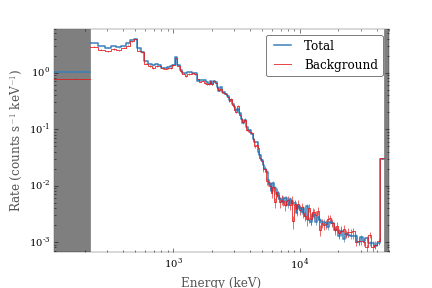

In [7]:
bgo0.set_active_measurements("250-43000")
bgo0.view_count_spectrum()

Range 50000-100000 translates to channels 11-16
Now using 6 channels out of 50


<IPython.core.display.Javascript object>


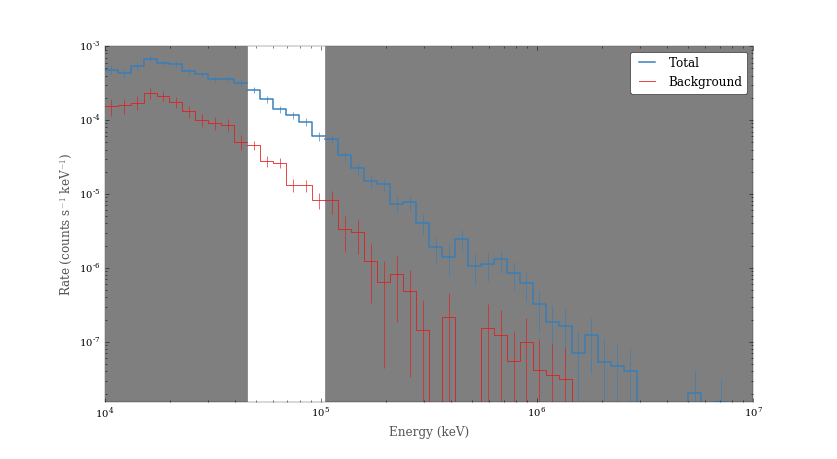

In [15]:
lle.set_active_measurements("50000-100000")
lle.view_count_spectrum()

## Fitting!

We are now ready for the standard **3ML** process:


In [9]:
triggerName = 'bn080916009'
ra = 121.8
dec = -61.3

data_list = DataList(nai3,bgo0,lle )

band = Band()

GRB = PointSource( triggerName, ra, dec, spectral_shape=band )

model = Model( GRB )

model.display()

name,value,min_value,max_value,unit,delta,free
bn080916009.spectrum.main.Band.K,0.0001,None,None,1 / (cm2 keV s),1e-05,True
bn080916009.spectrum.main.Band.alpha,-1.0,-1.5,3.0,,0.1,True
bn080916009.spectrum.main.Band.xp,500.0,10.0,None,keV,50.0,True
bn080916009.spectrum.main.Band.beta,-2.0,-5.0,-1.6,,0.2,True


In [10]:
jl = JointLikelihood( model, data_list, verbose=False )

res = jl.fit()

Best fit values:



,Best fit value,Unit
bn080916009.spectrum.main.Band.K,0.0146 +/- 0.0008,1 / (cm2 keV s)
bn080916009.spectrum.main.Band.alpha,-1.08 +/- 0.04,
bn080916009.spectrum.main.Band.beta,-2.181 +/- 0.027,
bn080916009.spectrum.main.Band.xp,(5.4 +/- 0.9)e+02,keV



NOTE: errors on parameters are approximate. Use get_errors().


Correlation matrix:



1.00,0.91,-0.96,0.77
0.91,1.00,-0.88,0.68
-0.96,-0.88,1.00,-0.87
0.77,0.68,-0.87,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
total,2292.437286
NAI3,1064.267213
BGO0,1198.556229
LLE,29.613844


<IPython.core.display.Javascript object>


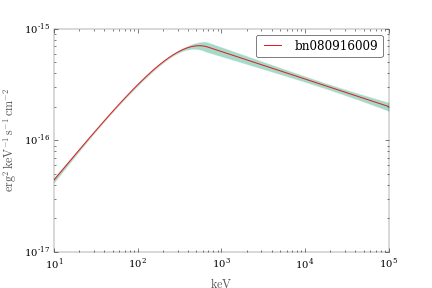

In [11]:
sp = SpectralPlotter(jl)

_=sp.plot_model(y_unit='erg2/(cm2 s keV)', num_ene=200,x_max=1E5)

We can examine our fit with the data:

<IPython.core.display.Javascript object>


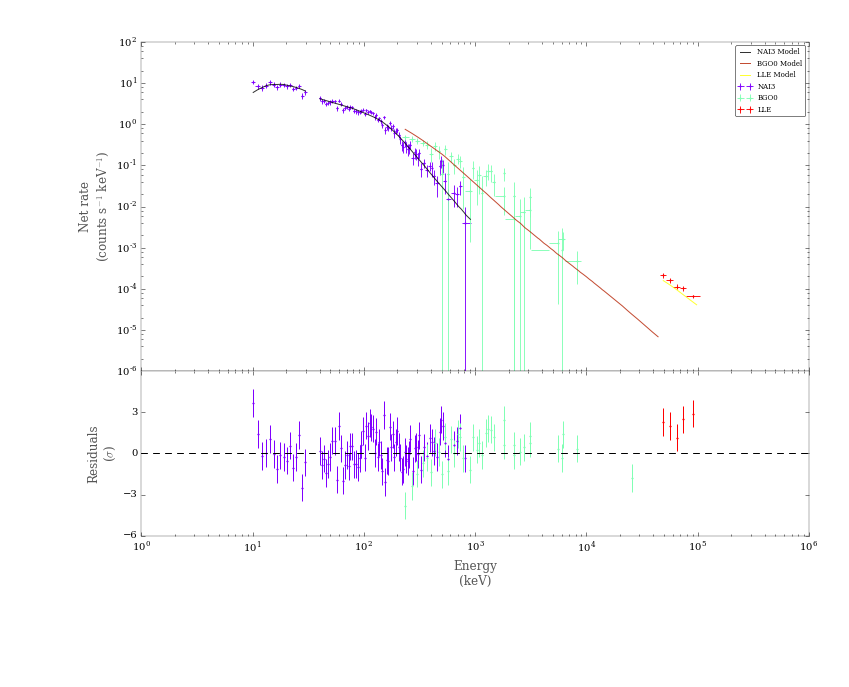

In [12]:
_ = display_ogip_model_counts(jl,min_rate=1,step=False)

In [13]:
res = jl.get_errors()

Name,Value,Unit
bn080916009.spectrum.main.Band.K,0.0146 -0.0007 +0.0009,1 / (cm2 keV s)
bn080916009.spectrum.main.Band.alpha,-1.08 -0.04 +0.04,
bn080916009.spectrum.main.Band.xp,(5.4 -0.8 +0.9)e+02,keV
bn080916009.spectrum.main.Band.beta,-2.181 -0.027 +0.026,


<IPython.core.display.Javascript object>


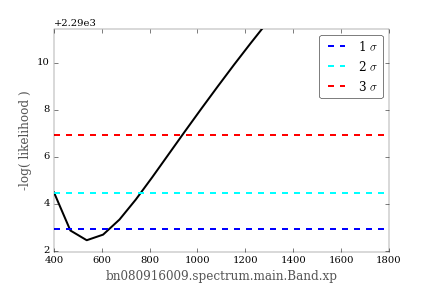

In [14]:
res = jl.get_contours(band.xp,400,1700,20)

<IPython.core.display.Javascript object>


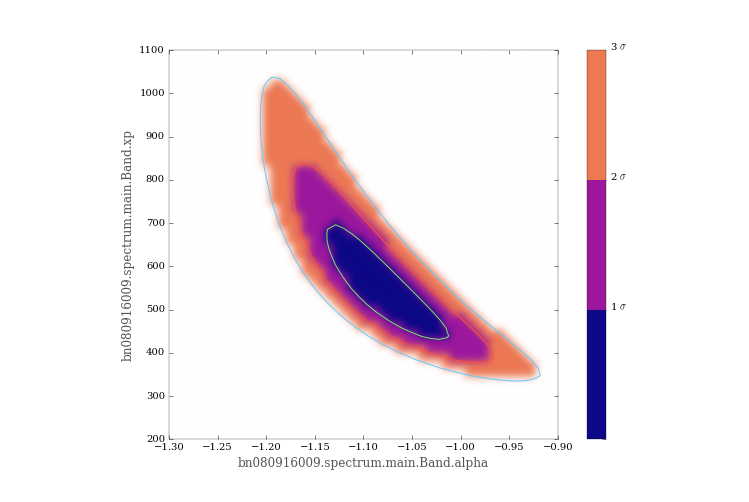

In [29]:
res = jl.get_contours(band.xp,200,1100,50,band.alpha,-1.3,-0.9,50)